In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [103]:
data_frame = pd.read_csv("datasets/bank+marketing/bank/bank-full.csv", delimiter = ';')
data_frame.drop(columns = ['default', 'loan'], inplace = True)

In [104]:
df = data_frame.copy()

In [105]:
df.y = (df.y == 'yes').astype(int)

In [106]:
full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [107]:
df_train, df_val = train_test_split(full_train, test_size = 0.25, random_state = 1)

In [108]:
df[::10]

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
10,41,admin.,divorced,secondary,270,yes,unknown,5,may,222,1,-1,0,unknown,0
20,28,blue-collar,married,secondary,723,yes,unknown,5,may,262,1,-1,0,unknown,0
30,57,technician,married,secondary,839,no,unknown,5,may,225,1,-1,0,unknown,0
40,44,services,divorced,secondary,2586,yes,unknown,5,may,160,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,19,student,single,primary,245,no,telephone,10,nov,98,2,110,2,other,0
45180,66,retired,married,secondary,3409,no,cellular,15,nov,414,2,27,6,failure,0
45190,32,blue-collar,married,secondary,136,no,cellular,16,nov,206,1,188,3,success,1
45200,38,technician,married,secondary,557,yes,cellular,16,nov,1556,4,-1,0,unknown,1


In [109]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [110]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome']

In [111]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [112]:
y_full_train = full_train.y.values

In [113]:
y_train = df_train.y.values

In [114]:
y_val = df_val.y.values

In [115]:
y_test = df_test.y.values

In [116]:
del df_train['y']
del df_val['y']
del df_test['y']

In [117]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

### Question 1

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
roc_auc_score(y_train, df_train.balance)

0.5888313805382317

In [120]:
roc_auc_score(y_train, df_train.day)

0.474042117616092

In [121]:
roc_auc_score(y_train, df_train.duration)

0.8147002759670778

In [122]:
roc_auc_score(y_train, df_train.previous)

0.5985653242764153

### Question 2

In [142]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

In [124]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

In [125]:
val_dicts[0]

{'job': 'blue-collar',
 'marital': 'married',
 'education': 'primary',
 'housing': 'no',
 'contact': 'cellular',
 'month': 'aug',
 'poutcome': 'unknown',
 'age': 57,
 'balance': 856,
 'day': 11,
 'duration': 194,
 'campaign': 6,
 'pdays': -1,
 'previous': 0}

In [126]:
dv = DictVectorizer(sparse = False)

In [127]:
dv.fit(val_dicts)

DictVectorizer(sparse=False)

In [128]:
print(dv.get_feature_names_out())

['age' 'balance' 'campaign' 'contact=cellular' 'contact=telephone'
 'contact=unknown' 'day' 'duration' 'education=primary'
 'education=secondary' 'education=tertiary' 'education=unknown'
 'housing=no' 'housing=yes' 'job=admin.' 'job=blue-collar'
 'job=entrepreneur' 'job=housemaid' 'job=management' 'job=retired'
 'job=self-employed' 'job=services' 'job=student' 'job=technician'
 'job=unemployed' 'job=unknown' 'marital=divorced' 'marital=married'
 'marital=single' 'month=apr' 'month=aug' 'month=dec' 'month=feb'
 'month=jan' 'month=jul' 'month=jun' 'month=mar' 'month=may' 'month=nov'
 'month=oct' 'month=sep' 'pdays' 'poutcome=failure' 'poutcome=other'
 'poutcome=success' 'poutcome=unknown' 'previous']


In [129]:
X_val = dv.transform(val_dicts)

In [130]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [131]:
def predict(df, dv, model):
     dicts = df[categorical + numerical].to_dict(orient='records')
 
     X = dv.fit_transform(dicts)
     y_pred = model.predict_proba(X)[:,1]
 
     return y_pred

In [132]:
dv, model = train(df_val, y_val)

In [133]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.03419174, 0.02462639, 0.01952402, ..., 0.30247162, 0.0025919 ,
       0.04536496])

In [134]:
auc = roc_auc_score(y_val, y_pred)
auc

0.8999609286865986

### Question 3

In [135]:
thresholds = np.arange(0, 1.01, 0.01)
thresholds 

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [136]:
# precision = tp / (tp + fp)
# recall = tp/(tp + fn)

In [137]:
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
 
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
 
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
 
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
 
    scores.append((t, tp, tn, fp, fn))
 
scores

[(0.0, 1098, 0, 7944, 0),
 (0.01, 1095, 944, 7000, 3),
 (0.02, 1090, 2151, 5793, 8),
 (0.03, 1084, 3116, 4828, 14),
 (0.04, 1065, 3944, 4000, 33),
 (0.05, 1048, 4610, 3334, 50),
 (0.06, 1029, 5131, 2813, 69),
 (0.07, 1011, 5538, 2406, 87),
 (0.08, 985, 5839, 2105, 113),
 (0.09, 965, 6082, 1862, 133),
 (0.1, 951, 6291, 1653, 147),
 (0.11, 922, 6455, 1489, 176),
 (0.12, 897, 6579, 1365, 201),
 (0.13, 880, 6685, 1259, 218),
 (0.14, 863, 6793, 1151, 235),
 (0.15, 846, 6868, 1076, 252),
 (0.16, 826, 6936, 1008, 272),
 (0.17, 806, 7001, 943, 292),
 (0.18, 790, 7075, 869, 308),
 (0.19, 764, 7147, 797, 334),
 (0.2, 740, 7189, 755, 358),
 (0.21, 722, 7249, 695, 376),
 (0.22, 701, 7292, 652, 397),
 (0.23, 686, 7326, 618, 412),
 (0.24, 673, 7360, 584, 425),
 (0.25, 657, 7390, 554, 441),
 (0.26, 641, 7416, 528, 457),
 (0.27, 632, 7436, 508, 466),
 (0.28, 622, 7475, 469, 476),
 (0.29, 611, 7499, 445, 487),
 (0.3, 597, 7525, 419, 501),
 (0.31, 586, 7543, 401, 512),
 (0.32, 576, 7559, 385, 522),
 (0.

In [138]:
columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,tn,fp,fn
0,0.00,1098,0,7944,0
1,0.01,1095,944,7000,3
2,0.02,1090,2151,5793,8
3,0.03,1084,3116,4828,14
4,0.04,1065,3944,4000,33
...,...,...,...,...,...
96,0.96,29,7930,14,1069
97,0.97,25,7933,11,1073
98,0.98,18,7938,6,1080
99,0.99,9,7940,4,1089


In [139]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.fp / (df_scores.tp + df_scores.fn)

In [140]:
df_scores[::10]

,threshold,tp,tn,fp,fn,precision,recall
0,0.0,1098,0,7944,0,0.121433,7.234973
10,0.1,951,6291,1653,147,0.365207,1.505464
20,0.2,740,7189,755,358,0.494983,0.687614
30,0.3,597,7525,419,501,0.587598,0.381603
40,0.4,478,7676,268,620,0.640751,0.244080
50,0.5,382,7754,190,716,0.667832,0.173042
60,0.6,287,7809,135,811,0.680095,0.122951
70,0.7,223,7851,93,875,0.705696,0.084699
80,0.8,151,7885,59,947,0.719048,0.053734
90,0.9,68,7920,24,1030,0.739130,0.021858


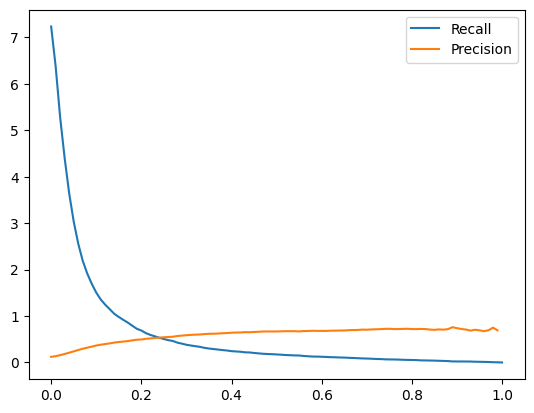

In [143]:
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.legend();

### Question 4

In [145]:
import pandas as pd


df_scores['diff'] = abs(df_scores['recall'] - df_scores['precision'])

min_diff_idx = df_scores['diff'].idxmin()
intersection_threshold = df_scores.loc[min_diff_idx, 'threshold']

print(f'Threshold where precision and recall intersect: {intersection_threshold}')


Threshold where precision and recall intersect: 0.24


In [147]:
# f1 = (2*(Precision * Recall))/(Precision + Recall)

In [148]:
df_scores['f1'] = (2*(df_scores['precision']*df_scores['recall']))/(df_scores['precision'] + df_scores['recall'])

In [149]:
df_scores[::10]

,threshold,tp,tn,fp,fn,precision,recall,diff,f1
0,0.0,1098,0,7944,0,0.121433,7.234973,7.113539,0.238858
10,0.1,951,6291,1653,147,0.365207,1.505464,1.140257,0.587817
20,0.2,740,7189,755,358,0.494983,0.687614,0.192631,0.575610
30,0.3,597,7525,419,501,0.587598,0.381603,0.205996,0.462709
40,0.4,478,7676,268,620,0.640751,0.244080,0.396671,0.353502
50,0.5,382,7754,190,716,0.667832,0.173042,0.494790,0.274864
60,0.6,287,7809,135,811,0.680095,0.122951,0.557144,0.208253
70,0.7,223,7851,93,875,0.705696,0.084699,0.620997,0.151246
80,0.8,151,7885,59,947,0.719048,0.053734,0.665314,0.099996
90,0.9,68,7920,24,1030,0.739130,0.021858,0.717273,0.042460


In [158]:
max_f1 = df_scores.f1.idxmax()
max_f1

df_scores.f1.max()


0.6083330679477035

In [171]:
thresh_for_max_f1 = df_scores.loc[max_f1, 'threshold']
thresh_for_max_f1

0.14

### Question 5

In [174]:
from sklearn.model_selection import KFold

In [176]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1) 
 
kfold.split(full_train)

<generator object _BaseKFold.split at 0x7f34d97879a0>

In [177]:
train_idx, val_idx = next(kfold.split(full_train))
print(f"training: {len(train_idx)},\nvalidation: {len(val_idx)}" )

training: 32551,
validation: 3617


In [179]:
print("full train: ",len(full_train))

full train:  36168


In [180]:
df_train = full_train.iloc[train_idx]
df_val = full_train.iloc[val_idx]

In [183]:
 
kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
scores = []
 
for train_idx, val_idx in kfold.split(full_train):
    df_train = full_train.iloc[train_idx]
    df_val = full_train.iloc[val_idx]
 
    y_train = df_train.y.values
    y_val = df_val.y.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
 
scores

[0.8993556310932126,
 0.8993206548548723,
 0.9112583997605899,
 0.9081048228522398,
 0.9120491718502978]

In [184]:
np.std(scores)

0.005611296539126669

### Question 6

In [185]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(solver = 'liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [187]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
 
for C in [0.000001, 0.001, 1]:
     
    scores = []
 
    for train_idx, val_idx in kfold.split(full_train):
        df_train = full_train.iloc[train_idx]
        df_val = full_train.iloc[val_idx]
 
        y_train = df_train.y.values
        y_val = df_val.y.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
 
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
 
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.006
